# Interactive fracture analysis

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
import mplstereonet as mpl

In [4]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## Import fracture data using Pandas

In [5]:
df = pd.read_csv('../data/image_data.csv', index_col='Unnamed: 0')
df.head()

,#DEPTH,DIP,AZIM,QUAL,DEVI,HAZI,AAZI,ADIP,DIPTYPE
0,1886.85,5.5,321.8,1.0,30.9,262.4,270.8,34.0,BED
1,1887.40,12.9,329.4,1.0,30.8,257.0,277.8,36.6,BED
2,1887.97,6.7,326.7,1.0,30.9,255.0,266.5,33.5,BED
3,1888.53,10.5,320.5,1.0,30.8,263.3,277.8,37.4,BED
4,1889.34,6.7,336.3,1.0,30.8,298.0,305.0,36.3,BED


In [6]:
df.shape

(822, 9)

In [7]:
df.describe()

,#DEPTH,DIP,AZIM,QUAL,DEVI,HAZI,AAZI,ADIP
count,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000
mean,2049.611095,22.452676,196.368856,0.760341,34.573601,298.962287,263.641606,40.852676
std,108.631076,31.926174,123.925011,0.249938,1.793871,3.754142,77.733593,10.978759
min,1886.850000,0.400000,0.100000,0.500000,30.800000,255.000000,6.700000,19.800000
25%,1955.320000,3.325000,89.975000,0.500000,32.900000,298.400000,291.525000,33.600000
50%,2021.365000,5.800000,189.350000,1.000000,35.400000,298.950000,301.600000,38.650000
75%,2149.080000,13.400000,320.450000,1.000000,36.100000,300.300000,305.800000,44.700000
max,2261.650000,90.000000,359.700000,1.000000,36.500000,306.900000,355.700000,90.000000


## Inspect fracture data with matplotlib/seaborn

In [8]:
df.columns

Index(['#DEPTH', 'DIP', 'AZIM', 'QUAL', 'DEVI', 'HAZI', 'AAZI', 'ADIP',
       'DIPTYPE'],
      dtype='object')

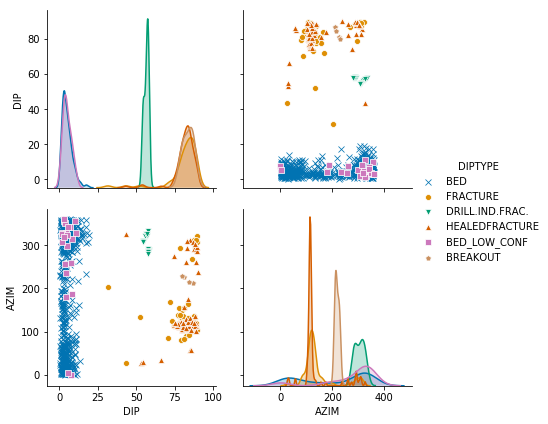

In [9]:
sns.pairplot(data=df, 
             vars=['DIP', 'AZIM'],
             hue='DIPTYPE',
             palette='colorblind',
             markers=['x','o','v','^','s','p'],
             height=3
            )
plt.show()

## Inspect fracture data with interactive mplstereonet

In [10]:
@interact(diptype=['FRACTURE', 'HEALEDFRACTURE', 'DRILL.IND.FRAC.', 'BREAKOUT', 'BED', 'BED_LOW_CONF'],
          alpha=widgets.FloatSlider(min=0, max=1, step=0.05, continuous_update=False), 
          poles=False,
          show_mean=False,
          density=False,
         )
def plot_data(diptype, alpha, poles, show_mean, density):
    """
    plot a stereonet of image data
    args:
        diptype, alpha, poles, show_mean, density
    returns:
        None
    """
    # set up the plot
    fig, ax = mpl.subplots(figsize=(6,6), ncols=1, nrows=1)

    # get data
    strike, dip = df.AZIM.loc[df['DIPTYPE'] == diptype], df.DIP.loc[df['DIPTYPE'] == diptype]
    
    # great circles
    ax.plane(strike, dip, 'g-', linewidth=1, alpha=alpha)
    
    # plot decoration
    ax.grid(color='k', alpha=0.2)
    data_count = strike.count()
    mean_azim = strike.mean()
    mean_dip = dip.mean()
    ax.text(0, 10, f'N points: {data_count}\nmean Azim: {mean_azim:.1f}\nmean Dip: {mean_dip:.1f}')
    
    # options
    if poles:
        ax.pole(strike, dip, 'kx', markersize=3, alpha=1)
    
    if show_mean:
        ax.plane(mean_azim, mean_dip, 'r--', lw=3, alpha=0.7)
        ax.pole(mean_azim, mean_dip, 'rs', markersize=5, alpha=0.7)

    if density:
        im = ax.density_contourf(strike, dip, measurement='poles', alpha=0.3)
        axins = inset_axes(ax,
                   width="5%",
                   height="45%",
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )
        cbar = fig.colorbar(im, cax=axins)
        cbar.ax.get_yaxis().labelpad = 15
        cbar.ax.set_ylabel('Orientation density distribution', rotation=90)

    return None

interactive(children=(Dropdown(description='diptype', options=('FRACTURE', 'HEALEDFRACTURE', 'DRILL.IND.FRAC.'…